# Module 2  -  Naive Bayes Classification

In [1]:
import pandas as pd
import os,sys,inspect

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from fma_metadata import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [2]:
# utility function
def make_confusion_matrix( cfm, title):
    group_names = ['TN','FP','FN','TP']

    group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.title(title)
    
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted',fontsize=12)
    

def plot_roc_curve(y_test, prediction, name_model):
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, prediction)

    plt.grid()
    auc_score = round(auc(test_fpr, test_tpr),2)
    plt.plot(test_fpr, test_tpr, label=f"{name_model} - AUC ="+ str(auc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title(f" AUC(ROC curve) - {name_model}")
    plt.grid(color='black', linestyle='', linewidth=0.5)
    plt.show()

In [3]:
# load dataset with echonest features
df = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/src/Data (cleaned)/Labels/song_happiness_labels.csv')
labels = labels.set_index('track_id')
df = df['echonest','audio_features']
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


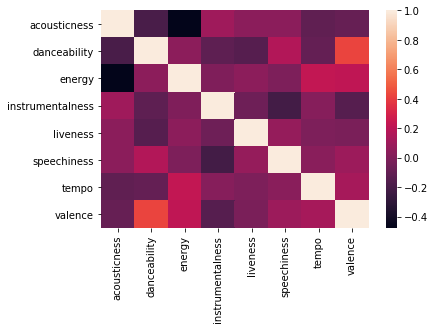

In [4]:
corr = df.corr()
sns.heatmap(corr)

In [5]:
df.shape

(13129, 8)

In [38]:
# check number of records per class
df.valence.value_counts()

sad      7724
happy    5405
Name: valence, dtype: int64

In [40]:
# encoding labels
le = LabelEncoder()
df['valence'] = le.fit_transform(df['valence'])
df.valence.value_counts()

1    7724
0    5405
Name: valence, dtype: int64

In [41]:
# remove labels from dataset 
labels = df[['valence']]
df.drop('valence', axis=1, inplace=True)


In [42]:
# split data in traning and test
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.30, random_state=42, stratify=labels,
                                                   shuffle=True) 

In [43]:
#help(GaussianNB)

In [54]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.62      0.52      0.56      1622
           1       0.70      0.77      0.73      2317

    accuracy                           0.67      3939
   macro avg       0.66      0.65      0.65      3939
weighted avg       0.66      0.67      0.66      3939



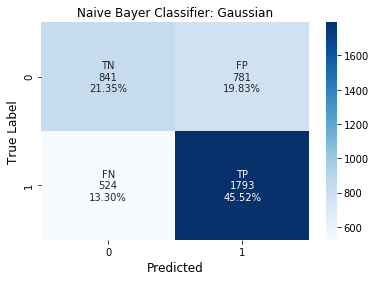

In [57]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, 'Naive Bayer Classifier: Gaussian')

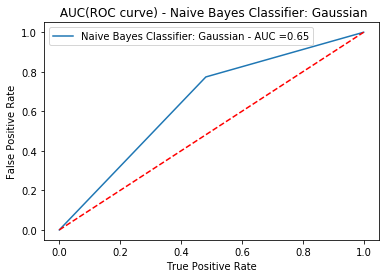

In [48]:
plot_roc_curve(y_test, y_pred, 'Naive Bayes Classifier: Gaussian')

In [49]:
from sklearn.inspection import permutation_importance

In [50]:
result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

In [52]:
sorted_idx = result.importances_mean.argsort()

result.importances[sorted_idx][:10].shape

(7, 10)

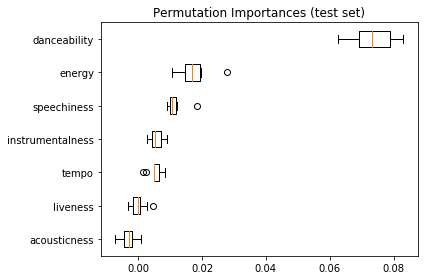

In [58]:
sorted_idx = result.importances_mean.argsort()
#plt.figure(figsize=(10,30))
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx][:20].T,
           vert=False, labels=X_test.columns[sorted_idx][:20])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()